In [2]:
import pandas as pd

df = pd.read_csv("../review_data/sentiment_reviews_with_themes.csv")
print(df.head())

                                              review  rating        date bank  \
0  everytime you uninstall the app you have to re...       1  2025-06-04  CBE   
1  አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...       4  2025-06-04  CBE   
2                                               best       5  2025-06-04  CBE   
3                                            bezabih       5  2025-06-04  CBE   
4                       best mobile banking app ever       5  2025-06-04  CBE   

        source sentiment_label  sentiment_score  \
0  Google Play        positive           0.1739   
1  Google Play         neutral           0.0000   
2  Google Play        positive           0.6369   
3  Google Play         neutral           0.0000   
4  Google Play        positive           0.6369   

                                           themes  
0               Transaction Speed, UI & Usability  
1                                   Uncategorized  
2                               Customer Feedback 

C:\Users\User\AppData\Local\Temp\ipykernel_13860\1363669163.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='Set2')


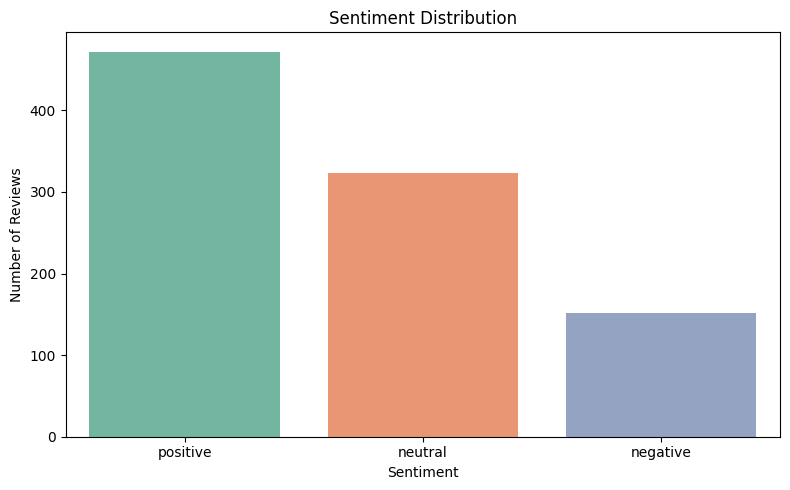

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

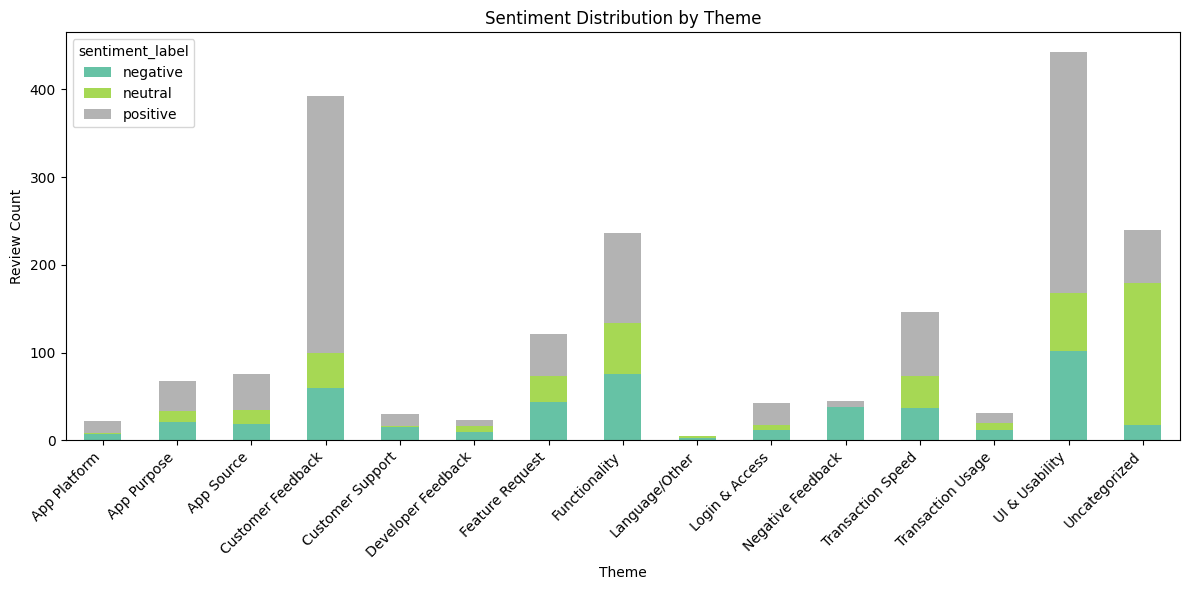

In [4]:
# Ensure theme column is string type and fill empty with "Uncategorized"
df['themes'] = df['themes'].fillna("Uncategorized").astype(str)

# Explode if multiple themes exist in one row
df = df.assign(themes=df['themes'].str.split(', ')).explode('themes')

# Group and plot
theme_sentiment = df.groupby(['themes', 'sentiment_label']).size().unstack().fillna(0)

# Plot stacked bar chart
theme_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title("Sentiment Distribution by Theme")
plt.xlabel("Theme")
plt.ylabel("Review Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

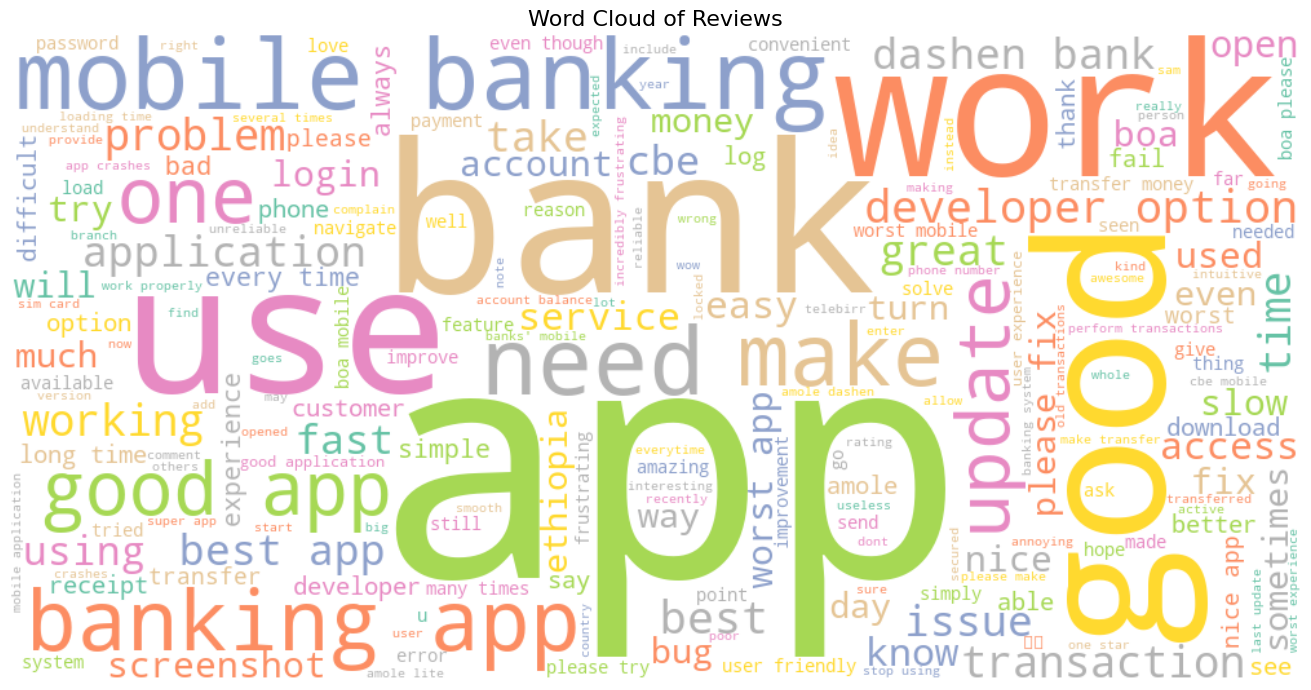

In [6]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the directory if not exists
os.makedirs("outputs", exist_ok=True)

# Generate and display word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='Set2').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews", fontsize=16)
plt.tight_layout()

# Save it safely
plt.savefig("outputs/wordcloud.png", dpi=300)
plt.show()

In [8]:
import os

# Create 'outputs' folder if it doesn't exist
os.makedirs("outputs", exist_ok=True)

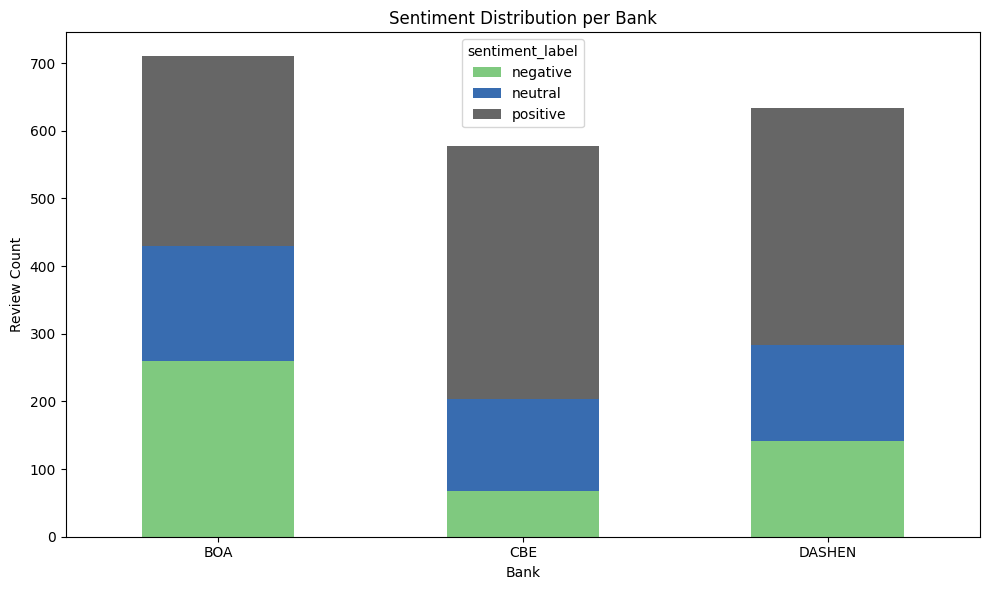

In [9]:
import matplotlib.pyplot as plt

# Group by bank and sentiment
bank_sentiment = df.groupby(['bank', 'sentiment_label']).size().unstack().fillna(0)

# Plot
bank_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')
plt.title("Sentiment Distribution per Bank")
plt.ylabel("Review Count")
plt.xlabel("Bank")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("outputs/bank_sentiment_chart.png", dpi=300)
plt.show()

In [11]:
import os

# Create outputs folder if it doesn't exist
os.makedirs("outputs", exist_ok=True)

In [12]:
import zipfile

with zipfile.ZipFile("outputs/visualizations.zip", 'w') as zipf:
    for root, dirs, files in os.walk("outputs"):
        for file in files:
            if file.endswith(".png") or file.endswith(".csv"):
                zipf.write(os.path.join(root, file), arcname=file)

print("✅ Zipped all visual outputs to outputs/visualizations.zip")

✅ Zipped all visual outputs to outputs/visualizations.zip


In [13]:
import os
print("✅ Outputs:")
print(os.listdir("outputs"))

✅ Outputs:
['bank_sentiment_chart.png', 'visualizations.zip', 'wordcloud.png']
